## Linear Regression Example 1

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data

In [2]:
x_train = tf.convert_to_tensor(np.array([1, 2, 3]))
y_train = tf.convert_to_tensor(np.array([1, 2, 3]))

In [3]:
print(x_train)
print(tf.rank(x_train), tf.shape(x_train))

tf.Tensor([1 2 3], shape=(3,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor([3], shape=(1,), dtype=int32)


In [4]:
print(y_train)
print(tf.rank(y_train), tf.shape(y_train))

tf.Tensor([1 2 3], shape=(3,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor([3], shape=(1,), dtype=int32)


### Plot the data

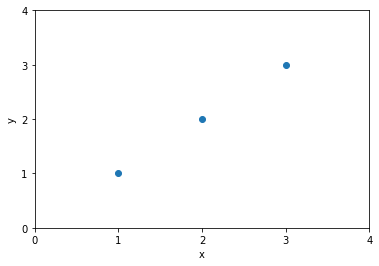

In [5]:
plt.plot(x_train, y_train, 'o')
plt.xticks(np.arange(0, 4.1, step=1))
plt.yticks(np.arange(0, 4.1, step=1))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Step 2. Linear Regression Model

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))

### Step 3. Loss,Optimizer, Metric

In [7]:
sgd = tf.keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=sgd)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Step 4. Train the model

In [8]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 487ms/step - loss: 1.9146
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.0304
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0075
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0069
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0066
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0063
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 0.0057
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.0054
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 0.0052
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0049
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.0047
Epoch 13/100
1/1 [==============================] - 0s 7ms

print the updated weights *W* and bias *b*

In [9]:
for layer in model.layers:
  print(layer.name, layer)
print(model.layers[0].weights)
print(model.layers[0].bias.numpy())

dense <tensorflow.python.keras.layers.core.Dense object at 0x7fb2ab397690>
[<tf.Variable 'dense/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.99088705]], dtype=float32)>, <tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.02071581], dtype=float32)>]
[0.02071581]


### Step 5. Test

In [10]:
y_predict = model.predict(x_train)
print(y_predict)

[[1.0116029]
 [2.0024898]
 [2.9933767]]


### Plot the Results

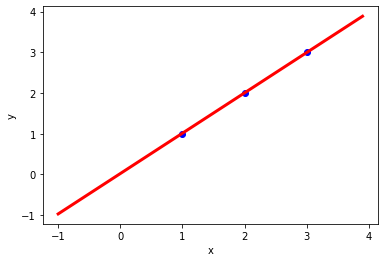

In [11]:
x_arr = np.arange(-1, 4, 0.1)
y_arr = model.predict(x_arr)

plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.plot(x_arr, y_arr, '-r', lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()